**Zahteve**
- scatter plot starost proti ceni na m2:
    - isto za vrsto nepremičnine
- na mapi narisan novogradnje
- barplot za count hiš, stanovanj, parcel, poslovnih prostorov
- za vsako regijo razmerje med številom prebivalcev in povprečno ceno na m2:
    - lahko stolpični diagram ali na mapi

**Ugotovitve**
1. starost nepremičnine in cena nista korelirani
2. večina novogradenj je v večjih slovenskih mestih, prav tako pa jih je kar nekaj blizu meje na Hrvaškem
3. kot pričakovano je največ oglasov za hiše in stanovanja, tem sledijo posesti/parcele in poslovni prostori
4. na prvem stolpičnem diagramu lahko vidimo, da največje razmerje med povprečno ceno stanovanja in številom prebivalcev pripada obalno-kraški regiji. To je predvidoma res, zaradi velikega števila počitniških hiš, katerih prebivalci nimajo stalnega naslova v tej regiji. Prav tako pa je presenetljivo, da je regija, ki vsebuje Ljubljano - osrednjeslovenska regija - zelo nizko. To je res zaradi velikega števila prebivalcev. Nekakšen popravek tega lahko vidimo na naslednjem diagramu, ki prikazuje razmerje med povprečno ceno stanovanja in povprečno neto plačo prebivalcev te regije. Na nek način prikaže koliko mesecev bi prebivalec neke regije moral delati, da bi si lahko privoščil povprečno stanovanje/hišo, brez da upoštevamo druge mesečne stroške. Na tem diagramu je osrednjeslovenska regija druga po vrsti, kar ni presenetljivo.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import python_data

# bolha = pd.read_csv('../data/bolha.csv', sep=",")
# mojikvadrati = pd.read_csv('../data/mojikvadrati.csv', sep=",")
mojikvadrati2 = pd.read_csv('../data/kvadrati2/kvadrati.csv', sep=",")
# nepremicnine_o = pd.read_csv('../data/nepremicnine_oddaja.csv', sep=",")
nepremicnine = pd.read_csv('../data/nepremicnine/nepremicnine_prodaja.csv', sep=",")


mojikvadrati2
# nepremicnine
# bolha

,id,naslov,latitude,longitude,vrsta_prodaje,vrsta,tip,velikost,leto_gradnje,cena,prodajalec_oseba,prodajalec_agencija,splosno,znacilnosti,opis,url
0,1,"Notranjsko - kraška, Ilirska Bistrica, Hrušica",45.846179,14.230267,Prodaja,Parcela,Zazidljiva,4194 m2,NaN,37.000 €,Nina Hudnik,RONI NEPREMIČNINE d.o.o.,Šifra:=PP397815031525,NaN,Iščete primerno zemljišče za gradnjo ali inves...,https://mojikvadrati.com/nepremicnina/467410-p...
1,2,"Pomurska, Murska Sobota",46.662464,16.165526,Prodaja,Parcela,Zazidljiva,1898 m2,NaN,40 €/m2,Rajko Šimonka,Prips nepremičnine d.o.o.,Šifra:=P26-2022,NaN,Nedaleč od trgovskega središča prodamo zemljiš...,https://mojikvadrati.com/nepremicnina/373458-p...
2,3,"Podravska, Destrnik, Vintarovci",46.495602,15.864561,Prodaja,Parcela,Zazidljiva,646 m2,NaN,23.500 €,Melanija Raišp,CENTURY 21 Slovenija,Šifra:=100104-589,Lega=Jug/Zahod|Luksuz=Lep razgled/Bližina nara...,"ZEMLJIŠČE V VINTAROVCIH, DESTRNIKProdamo zemlj...",https://mojikvadrati.com/nepremicnina/453310-p...
3,4,"Goriška, Kanal ob Soči, Doblar",46.115738,13.687290,Prodaja,Hiša,Samostojna,223.6 m2,1924.0,110.000 €,Jure Repše,RENES d.o.o.,Parcela:=17967 m2|Zgrajeno:=1924|Ener. izk.=G|...,Dodatno=Balkon/Atrij/Terasa,DOBLARSamostojna stanovanjska hiša velikosti 2...,https://mojikvadrati.com/nepremicnina/424445-p...
4,5,"Podravska, Maribor, Pekre",46.543337,15.592553,Prodaja,Hiša,Večstanovanjska,322.6 m2,1973.0,579.000 €,Barbara Pečenik,BAZA AGENCIJA d.o.o.,Velikost (bruto):=322.6 m2|Parcela:=535 m2|Št....,Ogrevanje=Toplotna črpalka|Luksuz=Klima/Lep ra...,Na odlični in mirni lokaciji v Pekrah prodamo ...,https://mojikvadrati.com/nepremicnina/469054-p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,6792,"Ljubljana, Šiška",46.073720,14.485868,Prodaja,Stanovanje,4-sobno,93.1 m2,1983.0,398.000 €,Urška Hočevar,Stan d.o.o.,Velikost (bruto):=93.1 m2|Zgrajeno:=1983|Adapt...,Dodatno=Dvigalo/Balkon/Parkirišče,"LJ. ŠIŠKA, DRAVLJE, BLIŽINA ZELENIH POVRŠINide...",https://mojikvadrati.com/nepremicnina/482910-p...
6776,6793,"Ljubljana, Vič-Rudnik, Rudnik",50.444777,22.244033,Prodaja,Stanovanje,4-sobno,97.2 m2,2020.0,470.000 €,Rojal invest d.o.o.,Rojal invest d.o.o.,Velikost (bruto):=97.2 m2|Nadstropje:=1|Zgraje...,Dodatno=Balkon/Dvigalo,"Ljubljana, Peruzzijeva ulica –Vila Bober, stan...",https://mojikvadrati.com/nepremicnina/482529-p...
6777,6794,Umag,45.432359,13.522410,Prodaja,Stanovanje,2-sobno,65 m2,2019.0,235.000 €,Sara Ducman,INFINIS PROPERTIES,Velikost (bruto):=65 m2|Nadstropje:=Pritličje|...,Ogrevanje=Toplotna črpalka/Talno gretje|Luksuz...,Prodamo čudovito 2-sobno stanovanje v luksuzne...,https://mojikvadrati.com/nepremicnina/473926-p...
6778,6795,"Goriška, Idrija",46.002398,14.027301,Prodaja,Poslovni prostor,Neživilska trgovina,309.13 m2,1980.0,300.000 €,Marko Udovč,REVESTUM d.o.o.,Velikost (bruto):=309.13 m2|Nadstropje:=Pritli...,Ogrevanje=Toplotna črpalka,Poslovni prostor - prodajalna v IdrijiPoslovni...,https://mojikvadrati.com/nepremicnina/472166-p...


(1800.0, 2030.0)

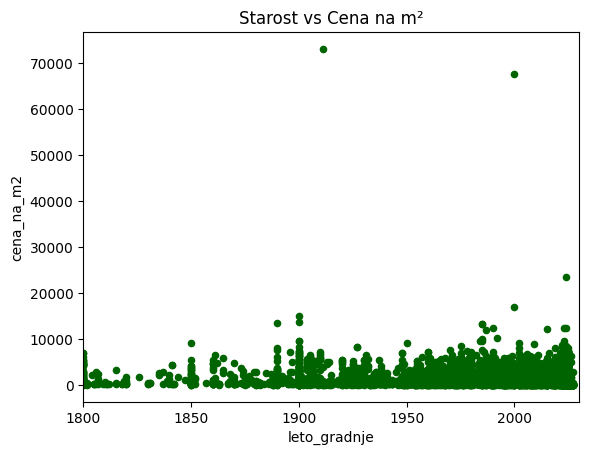

In [17]:
#mojikvadrati2[[""]].dropna(subset=['leto_gradnje']).plot(kind='scatter', x='leto_gradnje', y='cena_na_m2', title='Starost vs Cena na m²', color='darkgreen')

mojikvadrati2_f = mojikvadrati2[mojikvadrati2['cena'].str.split().str.get(1) == '€'].copy()

mojikvadrati2_f['cena_na_m2'] = mojikvadrati2_f['cena'].str.split().str.get(0).str.replace('.', '', regex=False).str.replace(',', '.').astype(float)

mojikvadrati2_f['cena_na_m2'] = mojikvadrati2_f['cena_na_m2'] / mojikvadrati2_f['velikost'].str.replace('.', '').str.replace('m2', '', regex=False).str.strip().astype(float)

# mojikvadrati2_f.sort_values(by=['cena_na_m2'], ascending=False)

# m = mojikvadrati2[mojikvadrati2['cena'].str.split().str.get(1) == '€'].copy()
# m['cena'] = m['cena'].str.replace('.', '').str.replace(',','.').str.strip(' €').astype(float)
# m.sort_values(by=['cena'], ascending=False)

mojikvadrati2_f[['leto_gradnje', 'cena_na_m2']].dropna(subset=['leto_gradnje']).plot(kind='scatter', x='leto_gradnje', y='cena_na_m2', title='Starost vs Cena na m²', color='darkgreen')


plt.xlim((1800, 2030))
#plt.ylim(0, 100000)

In [18]:
mojikvadrati2_f[['leto_gradnje', 'cena_na_m2']].dropna(subset=['leto_gradnje']).corr()["leto_gradnje"].cena_na_m2

np.float64(-0.03633250401226137)

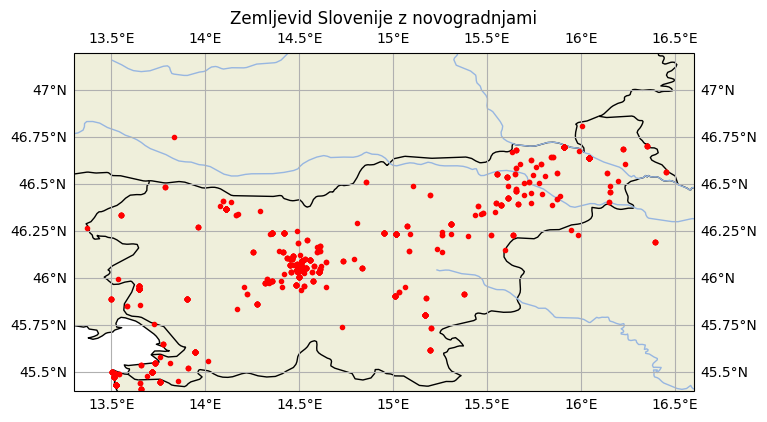

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geo_lookup")

newly_built = mojikvadrati2[mojikvadrati2["leto_gradnje"] > 2021]

# Seznam točk (longitude, latitude) - npr. Ljubljana, Maribor, Koper
points = [
    (14.5058, 46.0569),  # Ljubljana
    (15.6467, 46.5547),  # Maribor
    (13.7300, 45.5481),  # Koper
]

# newly_built

# Nastavi prikaz z geografsko projekcijo
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([13.3, 16.6, 45.4, 47.2])  # Meje Slovenije (približno)

# Dodaj zemljevidne značilnosti
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

# Prikaz točk
# for lon, lat in points:
#     ax.plot(lon, lat, marker='o', color='red', markersize=6, transform=ccrs.PlateCarree())

for index, row in newly_built.iterrows():
    ax.plot(row['longitude'], row['latitude'], marker='o', color='red', markersize=3, transform=ccrs.PlateCarree())

plt.title('Zemljevid Slovenije z novogradnjami')
plt.show()

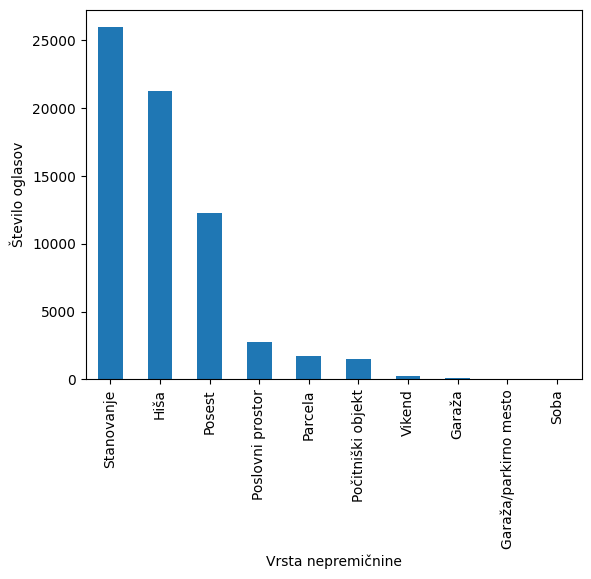

In [20]:
# mojikvadrati2[mojikvadrati2["vrsta"].isin(["Hiša", "Stanovanje", "Poslovni prostor", "Parcela"])]["vrsta"].value_counts().plot(kind='bar')
pd.concat([mojikvadrati2[mojikvadrati2["vrsta"].isin(["Hiša", "Stanovanje", "Poslovni prostor", "Parcela", "Posest", "Garaža/parkirno mesto", "Soba"])]["vrsta"],
           nepremicnine[nepremicnine["type"].isin(["Hiša", "Stanovanje", "Poslovni prostor", "Parcela", "Posest", "Počitniški objekt", "Vikend", "Garaža"])]["type"]]).value_counts().plot(kind='bar')

plt.xlabel('Vrsta nepremičnine')
plt.ylabel('Število oglasov')
plt.show()

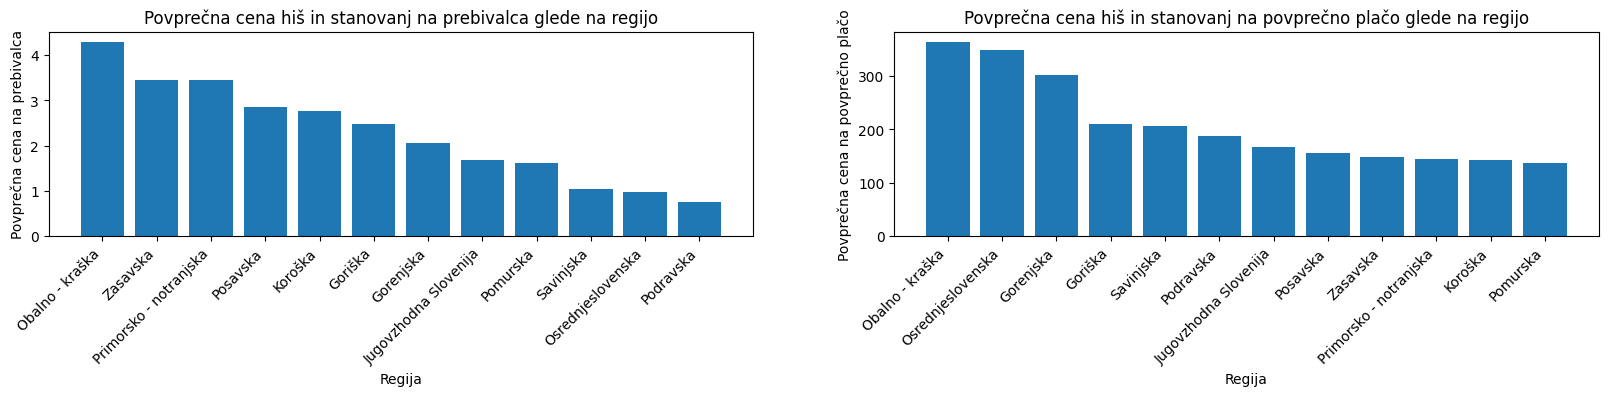

In [21]:
nepremicnine_mun = nepremicnine[(nepremicnine["municipality"].isin(python_data.municipalities)) & (nepremicnine["type"].isin(["Hiša", "Stanovanje"]))].copy()
nepremicnine_mun["price"] = nepremicnine_mun["price"].astype(float)


nepremicnine_mun["correct_region"] = nepremicnine_mun["municipality"].apply(lambda x: python_data.municipalities[x])

# ignoriramo osamelca https://www.nepremicnine.net/oglasi-prodaja/ribnica-na-pohorju-zaklad-narave-hisa_6968182/
region_prices = nepremicnine_mun[(nepremicnine_mun["price"] >= 50000) & (nepremicnine_mun["price"] < 100000000)].groupby(["correct_region"])["price"].agg("mean").reset_index()



price_per_resident = {}
price_per_income = {}
for reg, avg in zip(region_prices.correct_region, region_prices.price):
    price_per_resident[reg] = avg / python_data.regions_population[reg]
    price_per_income[reg] = avg / python_data.regions_avg_income[reg]


price_per_resident = sorted(price_per_resident.items(), key=lambda x: x[1], reverse=True)
price_per_income = sorted(price_per_income.items(), key=lambda x: x[1], reverse=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

axes[0].bar([e for e, _ in price_per_resident], [e for _, e in price_per_resident])
axes[0].set_xlabel("Regija")
axes[0].set_ylabel("Povprečna cena na prebivalca")
axes[0].set_title("Povprečna cena hiš in stanovanj na prebivalca glede na regijo")
axes[1].bar([e for e, _ in price_per_income], [e for _, e in price_per_income])
axes[1].set_xlabel("Regija")
axes[1].set_ylabel("Povprečna cena na povprečno plačo")
axes[1].set_title("Povprečna cena hiš in stanovanj na povprečno plačo glede na regijo")


fig.autofmt_xdate(rotation=45)
fig.set_figwidth(20)

# plt.bar([e for e, _ in price_per_resident], [e for _, e in price_per_resident])
# plt.ylabel('Povprečna cena na prebivalca')
# plt.xlabel('Regija')
# plt.xticks(rotation='vertical')
# plt.show()


In [23]:
price_per_income

[('Obalno - kraška', 364.2835912973208),
 ('Osrednjeslovenska', 348.7730222536156),
 ('Gorenjska', 302.3824241465199),
 ('Goriška', 209.03743544688967),
 ('Savinjska', 206.18880462481613),
 ('Podravska', 186.5318224204578),
 ('Jugovzhodna Slovenija', 166.519254002259),
 ('Posavska', 156.1206509304612),
 ('Zasavska', 148.07030183303783),
 ('Primorsko - notranjska', 143.89247979986345),
 ('Koroška', 142.70188131896612),
 ('Pomurska', 137.0950272988323)]

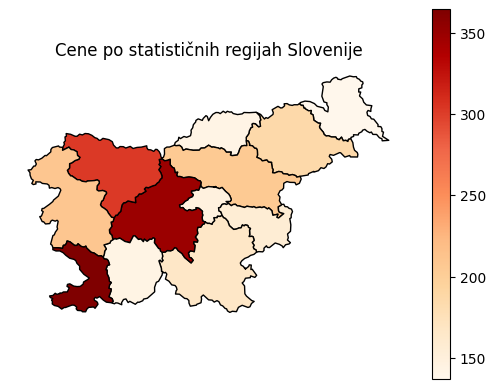

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Naloži GeoJSON s slovenskimi regijami
gdf = gpd.read_file("../data/regije/statistical-regions-gurs-simplified.geojson")  # Uporabi pravi path

# 2. Primer DataFrame-a s cenami po regijah
df = pd.DataFrame({
    # "REGIJA": ["Pomurska", "Podravska", "Koroška", "Savinjska", "Zasavska", "Posavska", "Jugovzhodna Slovenija", "Osrednjeslovenska", "Gorenjska", "Primorsko-notranjska", "Goriška", "Obalno-kraška"],
    # "CENA": [100, 120, 90, 110, 95, 105, 115, 130, 125, 100, 108, 140]
    "REGIJA": [e.replace(" - ", "-") for e, _ in price_per_income],
    "CENA": [e for _, e in price_per_income]
})

# 3. Združi po imenu regije
gdf = gdf.merge(df, left_on="name", right_on="REGIJA")

# 4. Nariši zemljevid
gdf.plot(column="CENA", cmap="OrRd", legend=True, edgecolor="black")
plt.title("Cene po statističnih regijah Slovenije")
plt.axis("off")
plt.show()


AttributeError: 'NoneType' object has no attribute 'set_label'

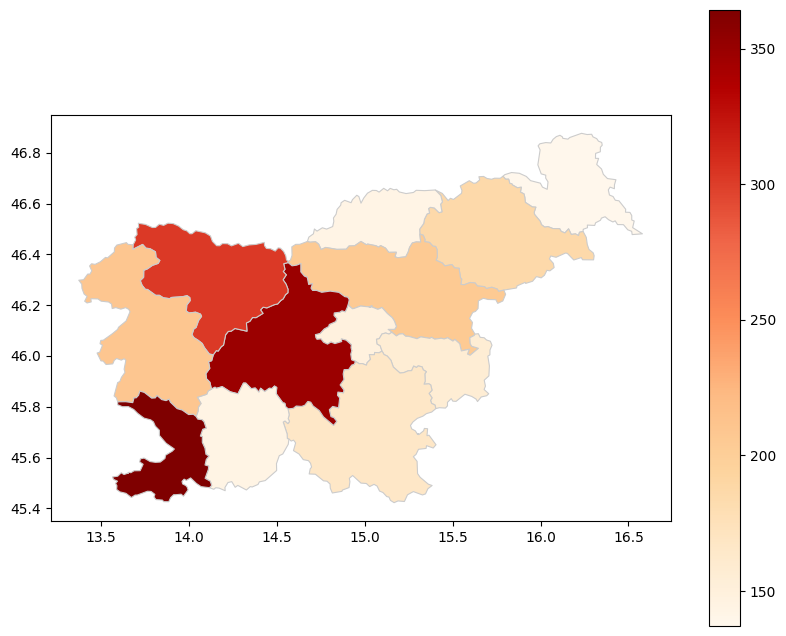

In [42]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors


# 1. Naloži GeoJSON
gdf = gpd.read_file("../data/regije/statistical-regions-gurs-simplified.geojson")  # Uporabi pravi path

# 2. Primer podatkov
df = pd.DataFrame({
    "REGIJA": [e.replace(" - ", "-") for e, _ in price_per_income],
    "CENA": [e for _, e in price_per_income]
})

# 3. Združi podatke (merge)
gdf = gdf.merge(df, left_on="name", right_on="REGIJA")

# 4. Prikaz z barvno lestvico in labelo
fig, ax = plt.subplots(figsize=(10, 8))
plot = gdf.plot(column="CENA", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, label="neki")

# 5. Dodaj labelo legende (colorbar)
cbar = ax.get_legend()
# print(cbar)
cbar.set_label("Cena v €/m²", fontsize=12)

# norm = colors.Normalize(vmin=gdf.pop_est.min(), vmax=gdf.pop_est.max())
# cbar = plt.cm.ScalarMappable(norm=norm, cmap='RdBu')
# ax_cbar = fig.colorbar(cbar, ax=ax)
# # add label for the colorbar
# ax_cbar.set_label('I am a label')


# Dodatne vizualne izboljšave
ax.set_title("Cene nepremičnin po regijah", fontsize=15)
ax.axis("off")

plt.show()


                   REGIJA        CENA
0           Obalno-kraška  364.283591
1       Osrednjeslovenska  348.773022
2               Gorenjska  302.382424
3                 Goriška  209.037435
4               Savinjska  206.188805
5               Podravska  186.531822
6   Jugovzhodna Slovenija  166.519254
7                Posavska  156.120651
8                Zasavska  148.070302
9    Primorsko-notranjska  143.892480
10                Koroška  142.701881
11               Pomurska  137.095027


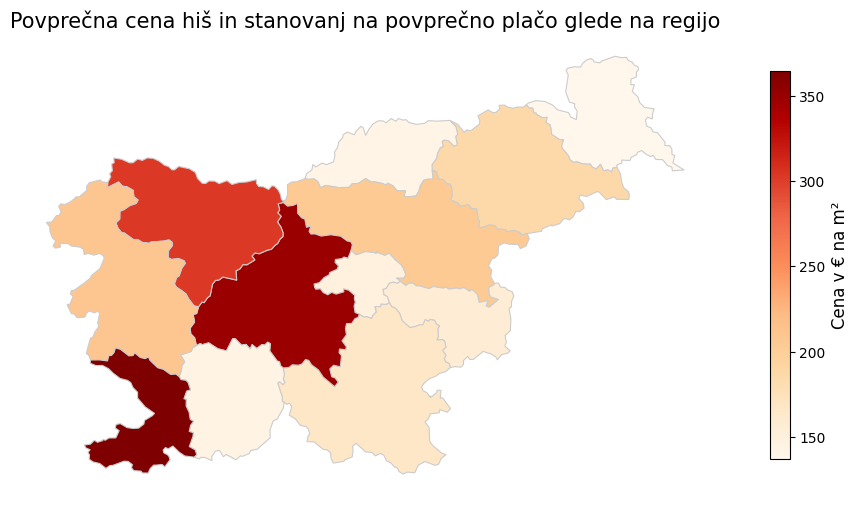

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. Naloži geojson
gdf = gpd.read_file("../data/regije/statistical-regions-gurs-simplified.geojson")

# 2. Primer podatkov
df = pd.DataFrame({
    "REGIJA": [e.replace(" - ", "-") for e, _ in price_per_income],
    "CENA": [e for _, e in price_per_income]
})

# 3. Združi geo in podatke
gdf = gdf.merge(df, left_on="name", right_on="REGIJA")

# 4. Pripravi barvno lestvico
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Barvna lestvica in normalizacija
cmap = plt.cm.OrRd
norm = mpl.colors.Normalize(vmin=gdf["CENA"].min(), vmax=gdf["CENA"].max())

# Nariši zemljevid
gdf.plot(column="CENA", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

# Ustvari barvno skalo (colorbar) s pravo labelo
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Hack za ScalarMappable brez podatkov
# cbar = fig.colorbar(sm, ax=ax)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.07, fraction=0.025)
cbar.set_label("Cena v € na m²", fontsize=12)

# Dodatki
ax.set_title("Povprečna cena hiš in stanovanj na povprečno plačo glede na regijo", fontsize=15)
ax.axis("off")

plt.show()
